In [1]:
import sklearn 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df = pd.read_csv('housePrice.csv')
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
dfc = df.dropna(subset=['Address'])
dfc

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [4]:
df["Area"] = pd.to_numeric(df["Area"], errors='coerce')
dfc = df[df["Area"] <= 300]
dfc

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


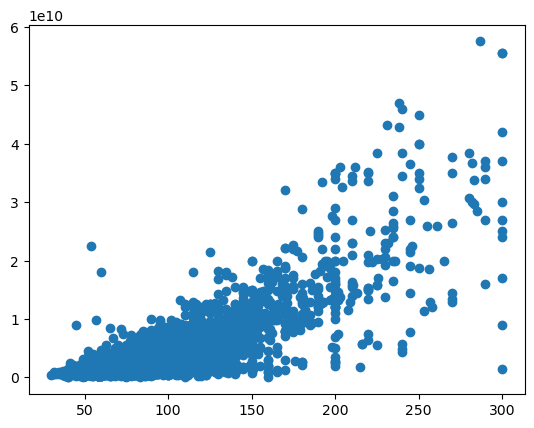

In [5]:
plt.scatter(dfc.Area , dfc.Price)

In [6]:
enc_address = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc_parking = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc_warehouse = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc_elevator = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# تبدیل و ایجاد ستون‌های جدید

address_encoded = enc_address.fit_transform(dfc[['Address']])
parking_encoded = enc_parking.fit_transform(dfc[['Parking']])
warehouse_encoded = enc_warehouse.fit_transform(dfc[['Warehouse']])
elevator_encoded = enc_elevator.fit_transform(dfc[['Elevator']])



In [7]:
# اضافه کردن به دیتافریم با نام‌های مناسب
# برای آدرس

address_cols = [f'Address_{cat}' for cat in enc_address.categories_[0]]
for i, col_name in enumerate(address_cols):
    dfc[col_name] = address_encoded[:, i]






/tmp/ipykernel_595864/1778979100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[col_name] = address_encoded[:, i]
/tmp/ipykernel_595864/1778979100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[col_name] = address_encoded[:, i]
/tmp/ipykernel_595864/1778979100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [8]:
# برای پارکینگ

parking_cols = [f'Parking_{cat}' for cat in enc_parking.categories_[0]]
for i, col_name in enumerate(parking_cols):
    dfc[col_name] = parking_encoded[:, i]


/tmp/ipykernel_595864/2562525362.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfc[col_name] = parking_encoded[:, i]
/tmp/ipykernel_595864/2562525362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[col_name] = parking_encoded[:, i]
/tmp/ipykernel_595864/2562525362.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

In [9]:
# برای انبار

warehouse_cols = [f'Warehouse_{cat}' for cat in enc_warehouse.categories_[0]]
for i, col_name in enumerate(warehouse_cols):
    dfc[col_name] = warehouse_encoded[:, i]

/tmp/ipykernel_595864/357503337.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfc[col_name] = warehouse_encoded[:, i]
/tmp/ipykernel_595864/357503337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[col_name] = warehouse_encoded[:, i]
/tmp/ipykernel_595864/357503337.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

In [10]:
# برای آسانسور

elevator_cols = [f'Elevator_{cat}' for cat in enc_elevator.categories_[0]]
for i, col_name in enumerate(elevator_cols):
    dfc[col_name] = elevator_encoded[:, i]

/tmp/ipykernel_595864/4003672908.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfc[col_name] = elevator_encoded[:, i]
/tmp/ipykernel_595864/4003672908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[col_name] = elevator_encoded[:, i]
/tmp/ipykernel_595864/4003672908.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

In [11]:
#df_encoded = pd.get_dummies(dfc, columns=['Address', 'Parking', 'Warehouse', 'Elevator'])
#df_encoded

In [34]:

msk = np.random.rand(len(dfc)) < 0.8
train = dfc[msk]
test = dfc[~msk]
train

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_Abazar,Address_Abbasabad,...,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,Address_nan,Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,87.0,2,True,True,True,Pardis,6.000000e+08,20000.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,59.0,1,True,True,True,Shahran,2.150000e+09,71666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,63.0,1,True,True,False,Feiz Garden,1.890000e+09,63000.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


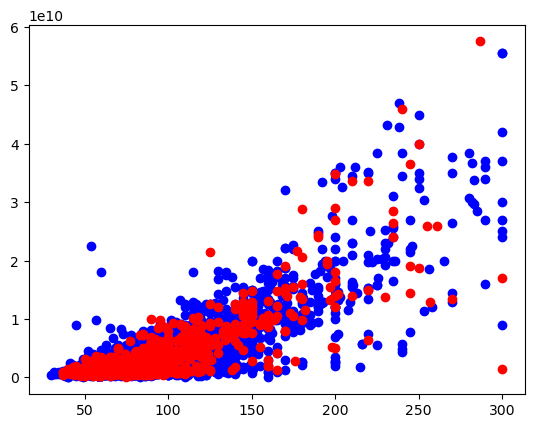

In [35]:
plt.scatter(train.Area , train.Price,color ='blue')
plt.scatter(test.Area , test.Price,color ='red')


In [36]:
# Get all columns except 'Price' and 'Price(USD)'
columns_to_use = [col for col in train.columns if col not in ['Price', 'Price(USD)','Address','Parking','Warehouse','Elevator']]


train_x = train[columns_to_use]
train_x


,Area,Room,Address_Abazar,Address_Abbasabad,Address_Abuzar,Address_Afsarieh,Address_Ahang,Address_Air force,Address_Ajudaniye,Address_Alborz Complex,...,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,Address_nan,Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,60.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,70.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,87.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,59.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,63.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3475,83.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3476,75.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3477,105.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [37]:
train_y = train[['Price']]
imputer = SimpleImputer(strategy='mean')
train_x_imputed = imputer.fit_transform(train_x)
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x_imputed)
# Now fit the model with the cleaned data
regr = sklearn.linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)
print(regr.coef_)


[[-4.20717733e+00  1.16395272e+06  1.05074310e+08 ... -3.26352866e+08
   0.00000000e+00  3.26352866e+08]]


In [38]:
columns_to_us = [col for col in test.columns if col not in ['Price', 'Price(USD)','Address','Parking','Warehouse','Elevator']]
test_y = test[['Price']]


test_x = test[columns_to_us]
impute = SimpleImputer(strategy='mean')
test_x_imputed = impute.fit_transform(test_x)
test_x_poly = poly.fit_transform(test_x_imputed)
test_y = test[['Price']]
test_y_= regr.predict(test_x_poly)


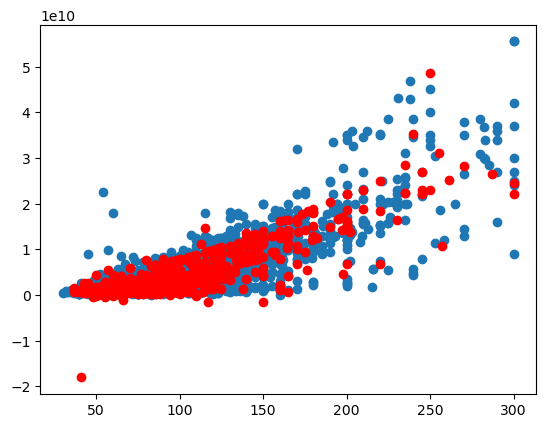

In [39]:
plt.scatter( train.Area , train.Price)
plt.scatter(test_x[['Area']] , test_y_ , color = 'red')
plt.show()

In [40]:
r2=sklearn.metrics.r2_score(test_y , test_y_)
r2

0.7926806362672659